# Objective:
To visualise factors that improve the performance of students

# Key questions to be answered:
Do test preparation courses and lunch improve on students performance?
Which gender performs better on the average?
Which race or ethnicity perform best on average?
Does parental level of education affect students performance?
Is there a relationship between math, reading and writing scores of students?
What subject do students perform best in?
# Dataset:
* gender: Female and male genders
* race/ethnicity: Contains different groups of race
* parental level of education: Highest level of eduation attained by parents
* lunch: Type of lunch taken by student
* test preparation: Shows if student completed the test preparation or not
* math_score: mathematics student score
* reading_score: reading student score
* writing_score: writing student score
* average: average of maths, reading and writing scores

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Import dataset

In [2]:
student = pd.read_csv(r"C:\Users\Akunna Anyamkpa\Downloads\Downloads\StudentsPerformance - Copy.csv")

### View the first few rows of the dataset

In [3]:
student.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
5,female,group B,associate's degree,standard,none,71,83,78,77
6,female,group B,some college,standard,completed,88,95,92,92
7,male,group B,some college,free/reduced,none,40,43,39,41
8,male,group D,high school,free/reduced,completed,64,64,67,65
9,female,group B,high school,free/reduced,none,38,60,50,49


### Check the shape of the dataset

In [4]:
student.shape

(1000, 9)

### Check the datatypes of the dataset to ascertain that the data is read in properly

In [5]:
student.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
average                         int64
dtype: object

### Remove all spaces in the various column names to aid analysis 

In [6]:
student.columns = student.columns.str.replace(' ','_')

### Rename column names that contain symbols

In [7]:
student = student.rename(columns={'race/ethnicity': 'race_ethnicity'})

student.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93


### Change column datatypes as appropriate

In [8]:
student.gender = student.gender.astype('category') # To convert gender into categories
student.race_ethnicity = student.race_ethnicity.astype('category') # To convert race_ethnicity into categories
student.parental_level_of_education = student.parental_level_of_education.astype('category') # To convert parent_level_of_education into categories
student.lunch = student.lunch.astype('category') # To convert lunch into categories
student.test_preparation_course = student.test_preparation_course.astype('category') # To convert test_preparation_course into categories

student.dtypes

gender                         category
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                        int64
reading_score                     int64
writing_score                     int64
average                           int64
dtype: object

### Let's analyse the quantitative variables in the dataset

In [9]:
student.describe()

,math_score,reading_score,writing_score,average
count,1000.00000,1000.00000,1000.00000,1000.00000
mean,66.08900,69.16900,68.05400,67.76200
std,15.16308,14.60019,15.19566,14.25835
min,0.00000,17.00000,10.00000,9.00000
25%,57.00000,59.00000,57.75000,58.00000
50%,66.00000,70.00000,69.00000,68.00000
75%,77.00000,79.00000,79.00000,78.00000
max,100.00000,100.00000,100.00000,100.00000


## Which gender performs better on the average?

In [10]:
student['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

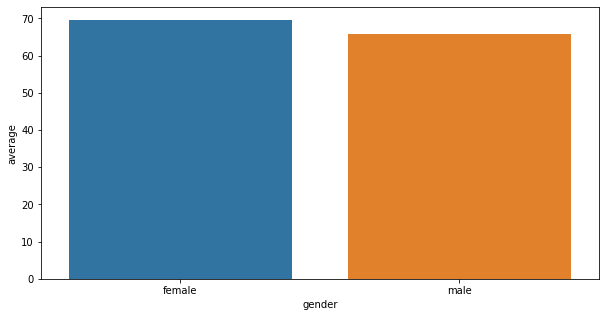

In [11]:
plt.figure(figsize = (10,5)) # To resize the plot

sns.barplot(x="gender", y="average", data=student, ci=None)
plt.show()

## Do test preparation courses and lunch improve on students performance?

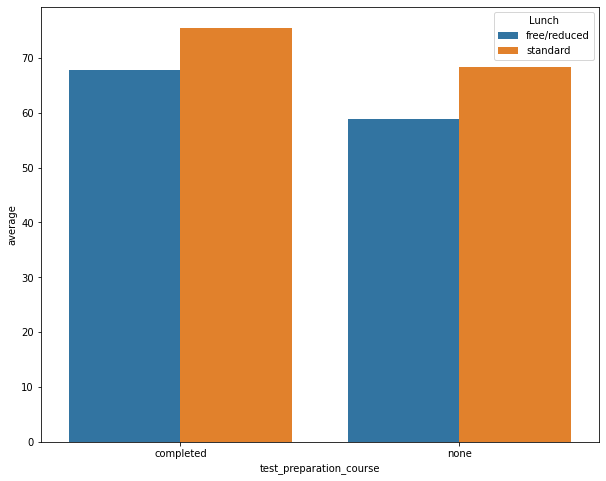

In [12]:
plt.figure(figsize = (10,8)) # To resize the plot

sns.barplot(x="test_preparation_course", y="average", hue="lunch", data=student,  ci=None) 
plt.legend(loc='upper right', title='Lunch')
plt.show() 

## Which race or ethnicity perform best on average?

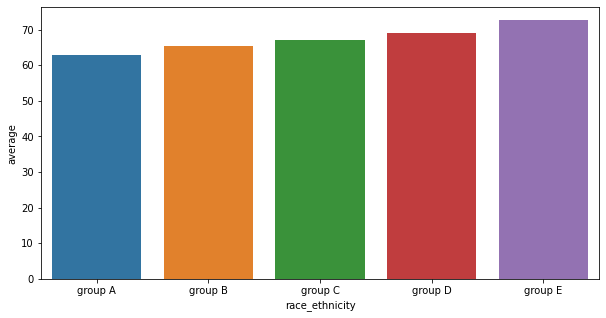

In [13]:
plt.figure(figsize = (10,5)) # To resize the plot

sns.barplot(x="race_ethnicity",y="average", data=student,
            ci=None)
plt.show() 

## Does parental level of education affect students performance?

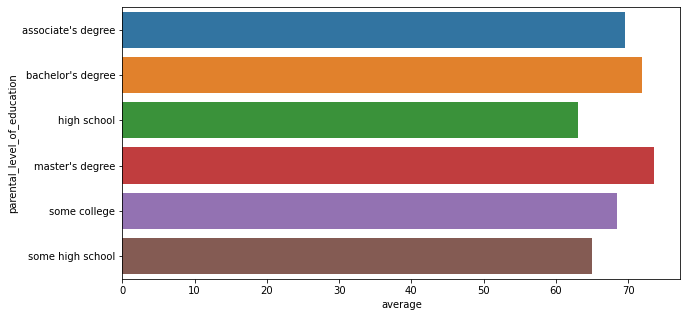

In [14]:
plt.figure(figsize = (10,5)) # To resize the plot

sns.barplot(x="average", y="parental_level_of_education", data=student,
            ci=None)
plt.show() 

## Is there a relationship between math, reading and writing scores of students?

,gender,math_score,reading_score,writing_score
994,male,63,63,62
995,female,88,99,95
996,male,62,55,55
997,female,59,71,65
998,female,68,78,77
999,female,77,86,86


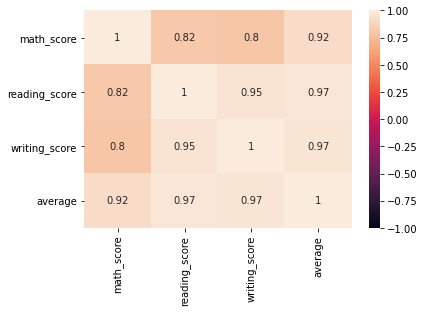

In [15]:
correlation = student.corr() # creating a 2-D Matrix with correlation plots
sns.heatmap(correlation, annot=True,vmin=-1, vmax=1);

student_score = student[['gender','math_score', 'reading_score','writing_score']]
student_score.tail(6)

## What subject do students perform best in? 

In [16]:
student.sum(axis = 0, skipna = True)

math_score       66089
reading_score    69169
writing_score    68054
average          67762
dtype: int64

In [17]:
student_score = student[['math_score', 'reading_score','writing_score']]
display(student_score)

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# RECOMMENDATION 
### To improve Students performance generally, the following measures should be put in place
* Standard Lunch should be given to students
* Test preparation course must be completed by all students
* Parents and guardians should be oriented ocassionally on their role in student performance.

Aside: For future data capture, equal records of male and female data should be maintained.
